**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [6]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [7]:
cv1 = GridSearchCV(rf, param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4, verbose=2,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)
cv1

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [8]:
cv1.fit(X_train,y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.6s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.6s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  2.7min finished
C:\Users\Kritika Shah\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [9]:
cv_results_df = pd.DataFrame(cv1.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.187774,0.058722,0.010446,0.003902,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,15,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,0.652255,0.042607,0.025433,0.003830,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,12,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
2,1.478306,0.054535,0.048622,0.008340,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,13,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750
3,2.682144,0.044414,0.088476,0.009520,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747454,0.753057,0.777644,0.771729,0.762471,0.012550,14,0.774453,0.773534,0.766139,0.767404,0.770382,0.003653
4,0.244347,0.028586,0.009994,0.000691,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.752905,0.758904,0.780036,0.774017,0.766466,0.010980,11,0.795911,0.796476,0.793695,0.796446,0.795632,0.001141
5,1.111804,0.117855,0.027686,0.001795,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.760089,0.765251,0.788567,0.778669,0.773144,0.011193,8,0.807081,0.805109,0.799176,0.801229,0.803149,0.003113
6,2.355986,0.115279,0.057333,0.006197,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.760964,0.765515,0.788793,0.778936,0.773552,0.011004,7,0.808194,0.806130,0.800846,0.803123,0.804573,0.002808
7,4.134059,0.067489,0.101938,0.002868,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.761481,0.765319,0.787854,0.779745,0.773600,0.010682,6,0.808276,0.806853,0.800682,0.804006,0.804954,0.002906
8,0.298491,0.008163,0.009961,0.001205,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.757853,0.755444,0.781544,0.773823,0.767166,0.010899,10,0.854161,0.856197,0.850317,0.852039,0.853178,0.002211
9,1.490058,0.091407,0.035623,0.000452,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.763956,0.764420,0.786690,0.780255,0.773830,0.009908,4,0.867242,0.871380,0.868213,0.867390,0.868557,0.001672


**Find the best hyperparameters from the cross-validation.**

In [10]:
max_test_score = cv_results_df['mean_test_score']
max_test_score_1 = list(max_test_score)
best_test_score = max(max_test_score_1)
print(best_test_score)
print()
best_parameter = cv_results_df[cv_results_df['mean_test_score']==best_test_score]
best_parameter_ans = best_parameter['params']
print(best_parameter_ans)
print()

# OR
print(cv1.best_params_)

0.7761985118393935

11    {'max_depth': 9, 'n_estimators': 200}
Name: params, dtype: object

{'max_depth': 9, 'n_estimators': 200}


________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [11]:
# Create a 5x5 grid
xx_example,yy_example = np.meshgrid([3,6,9,12],[10,50,100,200])
test_score = cv_results_df['mean_test_score'].values.reshape(4,4)
test_score

array([[0.75730766, 0.76365051, 0.76281941, 0.76247114],
       [0.7664656 , 0.77314378, 0.77355231, 0.77359992],
       [0.76716589, 0.77383029, 0.77496884, 0.77619851],
       [0.75722825, 0.77157003, 0.77381473, 0.77549938]])

In [12]:
# Set color map to `plt.cm.jet`
colormap = plt.cm.jet

Text(0, 0.5, 'Y coordinate')

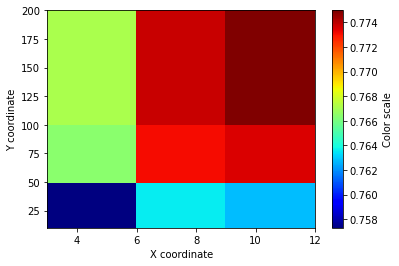

In [13]:
# Visualize pcolormesh
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example,test_score, cmap=colormap)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [14]:
# Create a dataframe of the feature names and importance
print(cv1.best_params_)
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv1.best_estimator_.feature_importances_
})
feat_imp_df

{'max_depth': 9, 'n_estimators': 200}


,Feature name,Importance
0,LIMIT_BAL,0.059961
1,EDUCATION,0.007545
2,MARRIAGE,0.004504
3,AGE,0.026774
4,PAY_1,0.437439
5,BILL_AMT1,0.042195
6,BILL_AMT2,0.041562
7,BILL_AMT3,0.037268
8,BILL_AMT4,0.034123
9,BILL_AMT5,0.032413


In [15]:
# Sort values by importance
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.437439
0,LIMIT_BAL,0.059961
11,PAY_AMT1,0.059434
12,PAY_AMT2,0.045518
13,PAY_AMT3,0.043299
5,BILL_AMT1,0.042195
6,BILL_AMT2,0.041562
7,BILL_AMT3,0.037268
14,PAY_AMT4,0.034321
8,BILL_AMT4,0.034123
